In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [3]:
rundf = pd.read_csv('results/'+
    '10kCtrl1NStart.csv',
                    sep=',',skiprows=6)
case="# select 10000 epidemics with non-pharmaceutical containment measures, "+\
          "schools open in Sep, changing world, new start, using checkpoints"
md(case)

# select 10000 epidemics with non-pharmaceutical containment measures, schools open in Sep, changing world, new start, using checkpoints

In [4]:
rundf.replace(-1, np.nan, inplace=True)

In [5]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

rundf["cp1totalInfected"]=rundf["cp1cRed"]+rundf["cp1cViolet"]
rundf["cp1totalInfected&Deceased"]=rundf["cp1totalInfected"]+rundf["cp1cDead"]

rundf["cp2totalInfected"]=rundf["cp2cRed"]+rundf["cp2cViolet"]
rundf["cp2totalInfected&Deceased"]=rundf["cp2totalInfected"]+rundf["cp2cDead"]

rundf["cp3totalInfected"]=rundf["cp3cRed"]+rundf["cp3cViolet"]
rundf["cp3totalInfected&Deceased"]=rundf["cp3totalInfected"]+rundf["cp2cDead"]

rundf["cp4totalInfected"]=rundf["cp4cRed"]+rundf["cp4cViolet"]
rundf["cp4totalInfected&Deceased"]=rundf["cp4totalInfected"]+rundf["cp4cDead"]

rundf["cp5totalInfected"]=rundf["cp5cRed"]+rundf["cp5cViolet"]
rundf["cp5totalInfected&Deceased"]=rundf["cp5totalInfected"]+rundf["cp5cDead"]

rundf["cp6totalInfected"]=rundf["cp6cRed"]+rundf["cp6cViolet"]
rundf["cp6totalInfected&Deceased"]=rundf["cp6totalInfected"]+rundf["cp6cDead"]

In [6]:
rundf.columns

Index(['[run number]', 'run#', '[step]', 'seed0', 'seed', 'seedD', 'cp1cRed',
       'cp1cRedNH', 'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed',
       'cp2cRedNH', 'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed',
       'cp3cRedNH', 'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed',
       'cp4cRedNH', 'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cp5cRed',
       'cp5cRedNH', 'cp5cViolet', 'cp5cVioletNH', 'cp5cDead', 'cp6cRed',
       'cp6cRedNH', 'cp6cViolet', 'cp6cVioletNH', 'cp6cDead',
       'cumulativeRedCount', 'cumulativeVioletCount', 'cumulativeDeadCount',
       'ticks', 'TinfSch', 'SinfSch', 'TinfNotSch', 'SinfNotSch',
       'totalInfected', 'totalInfected&Deceased', 'cp1totalInfected',
       'cp1totalInfected&Deceased', 'cp2totalInfected',
       'cp2totalInfected&Deceased', 'cp3totalInfected',
       'cp3totalInfected&Deceased', 'cp4totalInfected',
       'cp4totalInfected&Deceased', 'cp5totalInfected',
       'cp5totalInfected&Deceased', 'cp6totalInfected',
  

In [7]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [8]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,10000.0,10000.0,10000.0,10000.0
mean,1.7,614.6,1530.3,509.8
std,4.2,315.3,781.1,158.4
min,0.0,0.0,4.0,229.0
25%,0.0,521.0,1352.0,408.0
50%,0.0,727.0,1820.0,524.0
75%,1.0,834.0,2057.0,619.0
max,49.0,1221.0,3095.0,1116.0


In [9]:
rLim=1200

In [10]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [11]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &    10000.0 &             10000.0 &                 10000.0 & 10000.0 \\
mean  &        1.7 &               614.6 &                  1530.3 &   509.8 \\
std   &        4.2 &               315.3 &                   781.1 &   158.4 \\
min   &        0.0 &                 0.0 &                     4.0 &   229.0 \\
25\%   &        0.0 &               521.0 &                  1352.0 &   408.0 \\
50\%   &        0.0 &               727.0 &                  1820.0 &   524.0 \\
75\%   &        1.0 &               834.0 &                  2057.0 &   619.0 \\
max   &       49.0 &              1221.0 &                  3095.0 &  1116.0 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


# Select at cp2 (actual cumulative value, using symptomatic only,  $\approx$ 33.3, implicitly with *nan* as 0)

In [12]:
# existing epidemic a cp2 with .notnull() NB, the opposit1 is .isnull()
rundf[rundf['cp2cRed'].notnull()]['ticks'].describe().loc['count']

10000.0

In [13]:
rundf[rundf['cp2cRed'].notnull()][['cp2cRed','cp2totalInfected&Deceased']].describe()

,cp2cRed,cp2totalInfected&Deceased
count,10000.0,10000.0
mean,88.1,212.6
std,107.4,262.3
min,0.0,2.0
25%,10.0,20.0
50%,41.0,84.0
75%,140.0,350.0
max,733.0,2012.0


In [14]:
rundf[rundf['cp2cRed']>0]\
     [['cp2cRed','cp2totalInfected&Deceased']].describe()
# with data of epidemics that would have ended without New Start

,cp2cRed,cp2totalInfected&Deceased
count,9808.0,9808.0
mean,89.8,216.8
std,107.7,263.2
min,1.0,2.0
25%,10.0,22.0
50%,43.0,91.0
75%,142.0,355.2
max,733.0,2012.0


In [15]:
rundf['cp2GT70']=rundf['cp2cRed'] > 70
rundf[rundf.cp2GT70][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,3964.0,3964.0,3964.0
mean,191.5,467.1,496.5


In [16]:
rundf['cp2LE70']=rundf['cp2cRed'] <= 70
rundf[rundf.cp2LE70][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,6036.0,6036.0,6036.0
mean,20.2,45.6,518.5


In [17]:
rundf['cp2GT10']=rundf['cp2cRed'] > 10
rundf[rundf.cp2GT10][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,7350.0,7350.0,7350.0
mean,118.2,285.6,506.9


In [18]:
rundf['cp2LE10']=rundf['cp2cRed'] <= 10
rundf[rundf.cp2LE10][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,2650.0,2650.0,2650.0
mean,4.5,10.2,517.7


In [19]:
rundf['realistic_cp2']=rundf['cp2GT10'] & rundf['cp2LE70']
rundf[rundf.realistic_cp2][['cp2cRed','cp2totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,ticks
count,3386.0,3386.0,3386.0
mean,32.5,73.2,519.1


# Select at cp3 (actual cumulative value, using symptomatic only,  $\approx$ 37.5, implicitly with *nan* as 0)

In [20]:
# existing epidemic a cp3 with .notnull() NB, the opposit1 is .isnull()
rundf[rundf['cp3cRed'].notnull()]['ticks'].describe().loc['count']

9996.0

In [21]:
rundf['cp3GT90']=rundf['cp3cRed'] > 90 
rundf[rundf.cp3GT90][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,5045.0,5045.0,5045.0
mean,378.0,950.6,499.2


In [22]:
rundf['cp3LE90']=rundf['cp3cRed'] <= 90 
rundf[rundf.cp3LE90][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,4951.0,4951.0,4951.0
mean,19.1,41.6,520.7


In [23]:
rundf['cp3GT20']=rundf['cp3cRed'] > 20 
rundf[rundf.cp3GT20][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,6596.0,6596.0,6596.0
mean,299.4,749.1,505.6


In [24]:
rundf['cp3LE20']=rundf['cp3cRed'] <= 20 
rundf[rundf.cp3LE20][['cp3cRed','cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp3cRed,cp3totalInfected&Deceased,ticks
count,3400.0,3400.0,3400.0
mean,8.0,17.9,518.3


In [25]:
rundf['realistic_cp2_cp3']=rundf['realistic_cp2'] & rundf['cp3LE90'] & rundf['cp3GT20']

In [26]:
rundf[rundf.realistic_cp2_cp3][['cp2cRed','cp2totalInfected&Deceased','cp3cRed',
                                'cp3totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp2cRed,cp2totalInfected&Deceased,cp3cRed,cp3totalInfected&Deceased,ticks
count,1407.0,1407.0,1407.0,1407.0,1407.0
mean,35.6,72.7,40.0,84.1,527.8


# Considering cp4 (actual cumulative value, using symptomatic and asymptomatic cases,  $\approx$ 200.0)

In [27]:
rundf[rundf.realistic_cp2_cp3][['cp4cRed',
                                'cp4totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean']]

,cp4cRed,cp4totalInfected&Deceased,ticks
count,1044.0,1044.0,1407.0
mean,180.4,462.1,527.8


In [28]:
selectedrundf=rundf[rundf.realistic_cp2_cp3]

In [29]:
selectedrundf=rundf[rundf.realistic_cp2_cp3 & (rundf['cp4totalInfected&Deceased']>rundf['cp3totalInfected&Deceased'])]

In [30]:
selectedrundf                 [['cp4cRed',
                                'cp4totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]

,cp4cRed,cp4totalInfected&Deceased,ticks
count,1044.0,1044.0,1044.0
mean,180.4,462.1,620.9
std,134.6,354.6,110.8


In [31]:
md("# ------------------------------------------------------------\n"+\
    "# timeFunction displaying heat-maps and interval data\n"+\
    "### with the possibility of choosing the duration column (after a merge), if any\n"+\
    "# ------------------------------------------------------------")

# ------------------------------------------------------------
# timeFunction displaying heat-maps and interval data
### with the possibility of choosing the duration column (after a merge), if any
# ------------------------------------------------------------

In [32]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(rundf,day0,day1,durationCol,title):
    
    rundfHere=rundf.copy()
    rundfHere=rundfHere[rundfHere[durationCol]>=day0]
    rundfHere=rundfHere[rundfHere[durationCol]<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    if rundfHere.shape[0] == 0: return
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, rLim], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row is {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


In [33]:
#checkpoint names
start = 0
end=rLim
cp1=[1, 30,"cp1cRed","cp1totalInfected&Deceased"]
cp2=[2,119,"cp2cRed","cp2totalInfected&Deceased"]
cp3=[3,230,"cp3cRed","cp3totalInfected&Deceased"]
cp4=[4,316,"cp4cRed","cp4totalInfected&Deceased"]
cp5=[5,364,"cp5cRed","cp5totalInfected&Deceased"]
cp6=[6,453,"cp6cRed","cp6totalInfected&Deceased"]

# synopsis

In [34]:
selectedrundf.shape[0]

1044

In [35]:
selectedrundf                 [['cp2cRed',
                                'cp2totalInfected&Deceased',
                                'cp3cRed',
                                'cp3totalInfected&Deceased',
                                'cp4cRed',
                                'cp4totalInfected&Deceased',
                                'cp5cRed',
                                'cp5totalInfected&Deceased',
                                'cp6cRed',
                                'cp6totalInfected&Deceased',
                                'cumulativeRedCount',
                                'totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]

,cp2cRed,cp2totalInfected&Deceased,cp3cRed,cp3totalInfected&Deceased,cp4cRed,cp4totalInfected&Deceased,cp5cRed,cp5totalInfected&Deceased,cp6cRed,cp6totalInfected&Deceased,cumulativeRedCount,totalInfected&Deceased,ticks
count,1044.0,1044.0,1044.0,1044.0,1044.0,1044.0,1005.0,1005.0,980.0,980.0,1044.0,1044.0,1044.0
mean,35.1,71.9,40.3,85.6,180.4,462.1,354.1,900.4,623.8,1563.3,726.6,1810.9,620.9
std,13.8,41.3,17.0,53.8,134.6,354.6,213.8,535.4,217.9,527.0,221.9,544.0,110.8


In [36]:
tmp=selectedrundf             [['cp2cRed',
                                'cp2totalInfected&Deceased',
                                'cp3cRed',
                                'cp3totalInfected&Deceased',
                                'cp4cRed',
                                'cp4totalInfected&Deceased',
                                'cp5cRed',
                                'cp5totalInfected&Deceased',
                                'cp6cRed',
                                'cp6totalInfected&Deceased',
                                'cumulativeRedCount',
                                'totalInfected&Deceased','ticks']]\
.describe().loc[['count','mean','std']]
print (tmp.to_latex())

\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  cp2cRed &  cp2totalInfected\&Deceased &  cp3cRed &  cp3totalInfected\&Deceased &  cp4cRed &  cp4totalInfected\&Deceased &  cp5cRed &  cp5totalInfected\&Deceased &  cp6cRed &  cp6totalInfected\&Deceased &  cumulativeRedCount &  totalInfected\&Deceased &  ticks \\
\midrule
count &   1044.0 &                     1044.0 &   1044.0 &                     1044.0 &   1044.0 &                     1044.0 &   1005.0 &                     1005.0 &    980.0 &                      980.0 &              1044.0 &                  1044.0 & 1044.0 \\
mean  &     35.1 &                       71.9 &     40.3 &                       85.6 &    180.4 &                      462.1 &    354.1 &                      900.4 &    623.8 &                     1563.3 &               726.6 &                  1810.9 &  620.9 \\
std   &     13.8 &                       41.3 &     17.0 &                       53.8 &    134.6 &                      354.6 &    213.8 &           

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18)

,symptomatic,totalInfected&Deceased,duration
count,1044.0,1044.0,1044.0
mean,726.6,1810.9,620.9
std,221.9,544.0,110.8
min,23.0,44.0,316.0
25%,678.0,1716.8,561.0
50%,771.0,1934.0,617.5
75%,859.0,2107.0,684.0
max,1139.0,2687.0,1094.0


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       1044.0 &                  1044.0 &    1044.0 \\
mean  &        726.6 &                  1810.9 &     620.9 \\
std   &        221.9 &                   544.0 &     110.8 \\
min   &         23.0 &                    44.0 &     316.0 \\
25\%   &        678.0 &                  1716.8 &     561.0 \\
50\%   &        771.0 &                  1934.0 &     617.5 \\
75\%   &        859.0 &                  2107.0 &     684.0 \\
max   &       1139.0 &                  2687.0 &    1094.0 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 10 bins

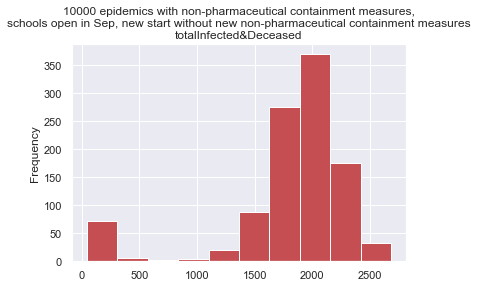

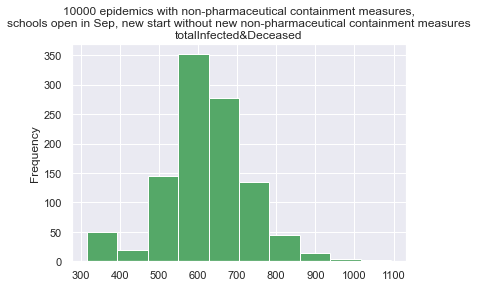

With 10 bins, the max value on z axis is 239.0, first row is [ 0.  0. 37. 29.  6.  0.  0.  0.  0.  0.]

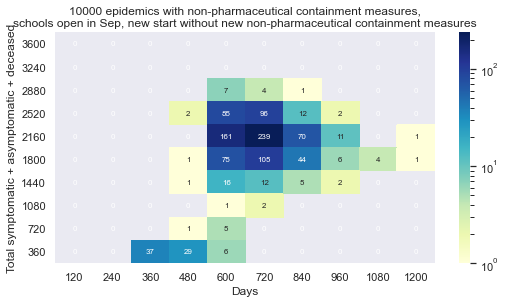

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 20 bins

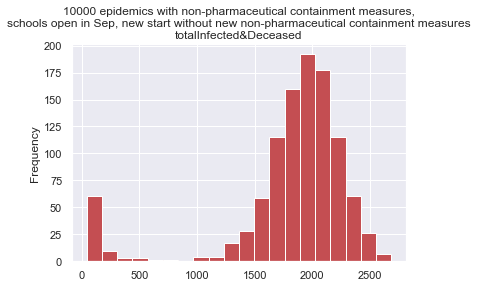

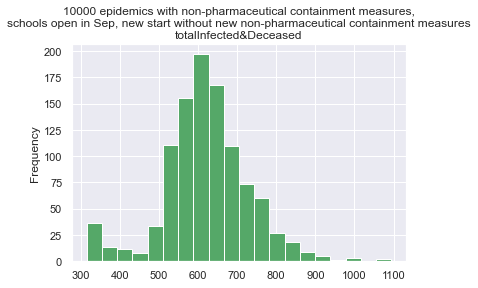

With 20 bins, the max value on z axis is 76.0, first row is [ 0.  0.  0.  0.  0. 34. 18.  7.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]

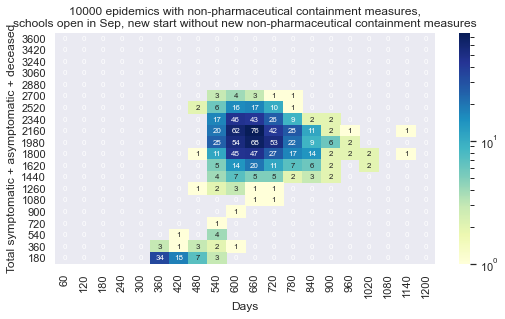

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 30 bins

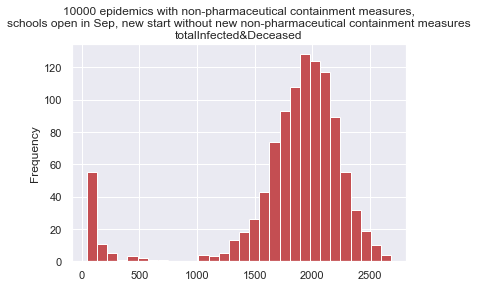

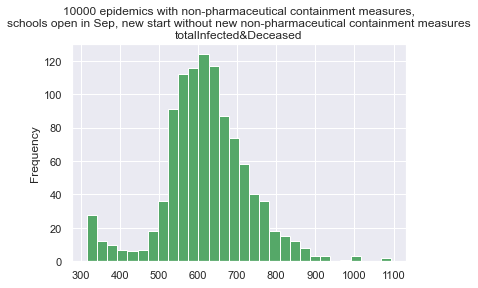

With 30 bins, the max value on z axis is 39.0, first row is [ 0.  0.  0.  0.  0.  0.  0.  6. 25. 11.  4.  3.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

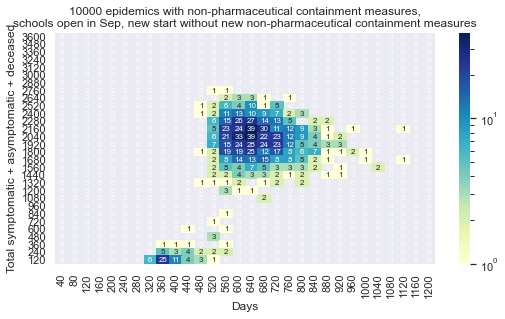

## Epidemics with duration between 0 days (2020-02-03) and 1200 days (2023-05-18), with 60 bins

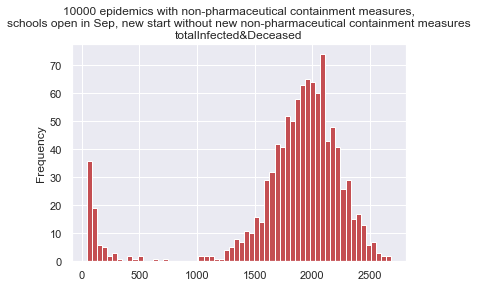

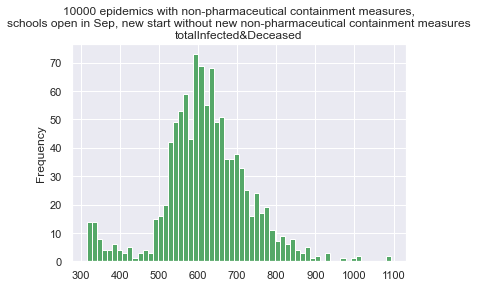

With 60 bins, the max value on z axis is 19.0, first row is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 3. 3. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

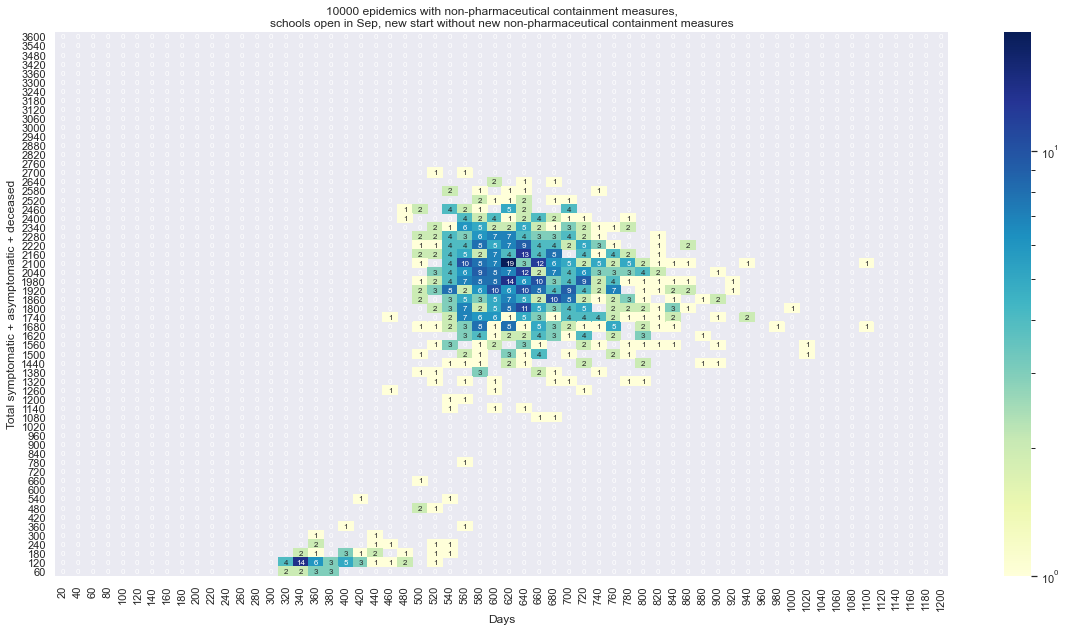

In [37]:
timeFunction(selectedrundf,start,end,"ticks",'10000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep, new start without new non-pharmaceutical containment measures')